In [ ]:
import numpy as np                                                   # Library for linear algebra and math utils
import pandas as pd                                                  # Dataframe library
import csv
import os
import re                                                             # library for regular expression operations
import string                                                         # for string operations

import nltk                                                           # Python library for NLP
from nltk.corpus import stopwords                                     # module for stop words that come with NLTK
from nltk.stem import PorterStemmer                                   # module for stemming
from nltk.tokenize import TweetTokenizer                              # module for tokenizing strings
import matplotlib.pyplot as plt                                       # library for visualization
from matplotlib import ticker
import seaborn as sns                                                 # library for visualization
import plotly.express as px                                           # library for visualization

from IPython.display import Image as im
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator        # module for WordCloud

from collections import Counter                                        # module for Counting
import liwc                                                            # Library for liwc
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer   #Module for doing Sentiment Analysis

from sklearn.preprocessing import LabelEncoder                         #Module for converting Categorial Data to Numerical Data 
from sklearn.model_selection import train_test_split                   #Module for Splitting the Dataset into Train and Test
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB                          #Module for Multinomial NB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report                      #Module for Classification Report
from sklearn.metrics import plot_confusion_matrix                      #Module for Plot Consusion Matrix


from sklearn.svm import SVC                                            #Module for Support Vector Machine
from sklearn.ensemble import RandomForestClassifier                    #Module for Random Forest Classifier


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  #Module for tuning the Hyper Parameters

from sklearn.linear_model import LogisticRegression                   #Module for Logistic Regression


#from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold                   #Module for Cross Validation
import xgboost  
from xgboost import XGBClassifier                                     #Module for XGBClassifier


In [ ]:
! pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.3 MB/s 


In [ ]:
!pip install liwc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Check the current Directory
!pwd

/content


# Import the Dataset

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#os.getcwd()


In [ ]:
df = pd.read_csv("Data/covid19_tweets.csv")
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# Explore Data set 

In [ ]:

print("The number of Tweets in the Data set is:",len(df))

The number of Tweets in the Data set is: 179108


Get the columns name

In [ ]:
list(df.columns.values)

['user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'is_retweet']

This part helps to show all content of the tweet

In [ ]:
pd.set_option('display.max_colwidth', None)

Check one of the tweets from df Data frame

In [ ]:
df.iloc[158001]

user_name                                                                                                                                           Coronavirus Live
user_location                                                                                                                                        Los Angeles, CA
user_description                                                                                      Coronavirus Realtime Global Statistics | \nData from CDC & WHO
user_created                                                                                                                                     2020-03-22 03:42:34
user_followers                                                                                                                                                   120
user_friends                                                                                                                                                     250
user_favou

This part just show the text of Tweet

In [ ]:
df.iloc[158001].text

'𝗖𝗼𝗿𝗼𝗻𝗮𝘃𝗶𝗿𝘂𝘀 𝘄𝗼𝗿𝗹𝗱𝘄𝗶𝗱𝗲 𝗹𝗶𝘃𝗲 𝘀𝘁𝗮𝘁𝗶𝘀𝘁𝗶𝗰𝘀 🌎\n🇺🇲  🇮🇳  🇮🇹  🇫🇷  🇨🇳  🇬🇧\nTotal Cases:  23,130,443\nNew Cases:   +22,027\nDeaths… https://t.co/tf8bUgruJB'

In [ ]:
print(df.iloc[174530].text)

https://t.co/DpVMpfeG0K Clear PET Insert Face Mask in Navy or Grey #teachersareessential #teacherstrong #COVID19… https://t.co/03LHhSIaAI


This part we check the Null values in Dataset based on each column

In [ ]:
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

## Preprocessing Tweet text

In the preprocess function , we remove the URLs ,Old style retweet text , Hashtags and convert the text to lower case. Also, remove Punctuation and Stop words from Tweets. We need to remove some emojies from Tweets,here are some example of tweets which has emojies.

In [ ]:
# download the stopwords from NLTK
nltk.download('stopwords')
stopwords_english = stopwords.words('english') 
print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [ ]:
df.iloc[84536].text

'#COVID19 : #Diet matters more now | The #BMJ 🍎🍏🍊🍐🥬🥒🍆🌶🥑🌽🥔\U0001f9c5\U0001f9c4🍳🥗🍜🍛🥜🍽🥣\U0001f9c9☕️ https://t.co/Vas3Oo8YjW'

In [ ]:
df.iloc[111137].text

'@devisridhar Hope he’s monitoring this\n🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻… https://t.co/oJVSkfJnea'

In [ ]:
df.iloc[21923].text

"https://t.co/KOkMh4DOuc #15Jul and #SiliconValley still hasn't learned a lesson in the #Covid19 #Coronavirus time… https://t.co/rOwR6Cm0Gl"

This function remove all emojies,symbols, from tweet text

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
#remove_emojis(df.iloc[158001].text)

In [ ]:
def preprocess_tweets(tweet):
    
    #change the tweet text to lower
    tweet = tweet.lower()
    
    # stop words in English
    stopwords_english = stopwords.words('english') 
    # remove URL
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', str(tweet))
    #remove Hashtags
    tweet = re.sub('#[A-Za-z0-9_]+','', tweet)
    #remove Username
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    #tweet = re.sub(r'#', '', tweet)
    #remove Numbers
    tweet = re.sub('\w*\d\w*', '', tweet)
    #tweet = re.sub(r'\d+', '', tweet)
    #remove all special characters 
    #tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    #remove Emojies
    tweet = remove_emojis(str(tweet))
    #remove \n 
    tweet = re.sub('\n', '', tweet)
     
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet) 
    
    tweets_clean = []
    for word in tweet_tokens:
        #print(word)
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)

    return tweets_clean


In [ ]:
#This part we run preprocess_tweets() for each tweet in df Dataframe
df['text'] = df['text'].apply(lambda x: preprocess_tweets(x))
display(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"[smelled, scent, hand, sanitizers, today, someone, past, would, think, intoxicated, …]",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,"[hey, made, sense, players, pay, respects, …]",NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,"[trump, never, claimed, hoax, claim, effort, …]",['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,"[one, gift, give, appreciation, simple, things, always, around, …]",['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,"[july, media, bulletin, novel, …]","['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,"[thanks, nominating, challenge, nominate, …]",['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,"When your cat has more baking soda than Ninja Turtles but your too punk to care. Gamer, Frisbee and sunshine these are a few of my favorite things. Metal!",2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,"[year, insanity, lol]",['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did Want a World Govt of Corporations https://t.co/oYU6xhIIh8 #NonPartisanDemocracy\nGAB/Parler: Bee@Beehemoth,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,"[powerful, painting, juan, lucena, tribute, grandparents, died, covid, grandc, …]",NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Musician. Nature Improvisation HealthCare Aeronautics Fashion Financial Entertainment Photography BridgeBuilder",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"[students, test, positive, major, university, abc, news]",['COVID19'],Twitter for iPhone,False


Some clean tweets after pre-process text

In [ ]:
df.iloc[158001].text

['total', 'cases', 'new', 'cases', 'deaths', '…']

In [ ]:
df.iloc[84536].text

In [ ]:
df.iloc[174530].text

In [ ]:
df.iloc[21923].text

['still', 'learned', 'lesson', 'time', '…']

In [ ]:
df.iloc[91575].text

[]

In [ ]:
df.iloc[4].text

The "covid19" repeats the most in the text and we try to remove it and some other words which seems unimportant from the data set 

In [ ]:
#We remove these aditional words (noises which don't tell us much about the content) from tweets
additional_words=['like','get','u','yankees','yankeespr','diane3443','ani','sabc','enca','hoax','hvbxxb','today','hey','mlb', 'amp','covid',\
                  '…','’','us','...','one','“','”','️','abd','juan','enca','diane','dtype','iomohmai','lucena','bassit','hoax','tribute','kansalrohit','oof','chouhanshivraj','abdlbaasit','lamohmai']
#RemoveWorld additional repetetive words from the tweets
df['text'] = df['text'].apply(lambda x:' '.join([item for item in x if item not in additional_words])) 

In [ ]:
df.iloc[21923].text

'still learned lesson time'

In [ ]:
#df['text'] = df['text'].apply(lambda x:' '.join([item for item in x])) 

## Common words in Tweet text

This Section we will find the 20 most frequent words in our clean tweet dataset. 

In [ ]:
clean_tweets = df['text']

In [ ]:
clean_tweets[1]

In [ ]:
len(clean_tweets)

In [ ]:
#Create a list which contains all the words in the cleaned_tweets
words_list=[word for line in clean_tweets for word in line.split()]


In [ ]:
#Print 10 words from Word_list
words_list[:10]

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'made']

In [ ]:
word_counts=Counter(words_list).most_common(25)
word_df=pd.DataFrame(word_counts)
word_df.columns=['Word','Frequency']
display(word_df.head(25))

,Word,Frequency
0,cases,18834
1,new,14890
2,people,9305
3,deaths,7560
4,pandemic,6659
5,coronavirus,4969
6,health,4908
7,positive,4784
8,total,4733
9,need,4250


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



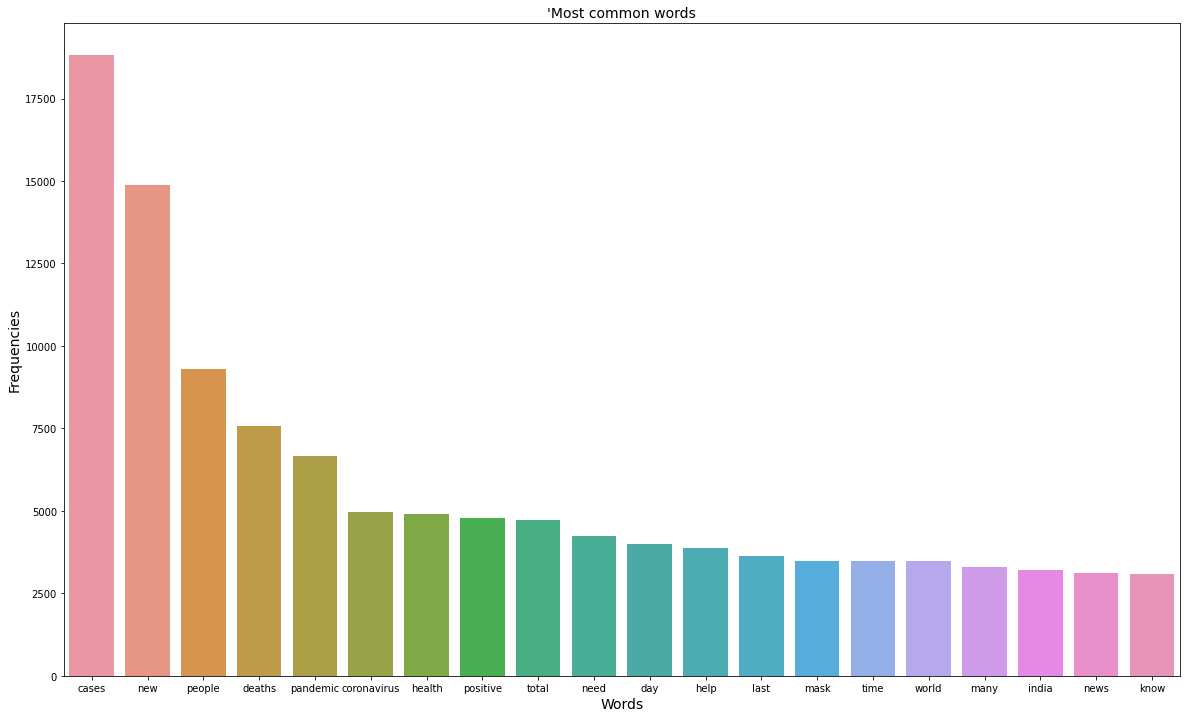

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(word_df["Word"].values[:20],word_df["Frequency"].values[:20])

plt.title("'Most common words",fontsize=14)
plt.xlabel("Words",fontsize=14)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

In [ ]:
# To be able to see the figures (in Jupyter Lab) by plotly.express you have to install these packages

#!conda install jupyterlab "ipywidgets>=7.5"
#!conda install "nodejs >=10.0.0"
#!jupyter labextension install jupyterlab-plotly@4.14.3
#jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3

## Top 10 Hashtags

We plot the top 10 hashtags at this section

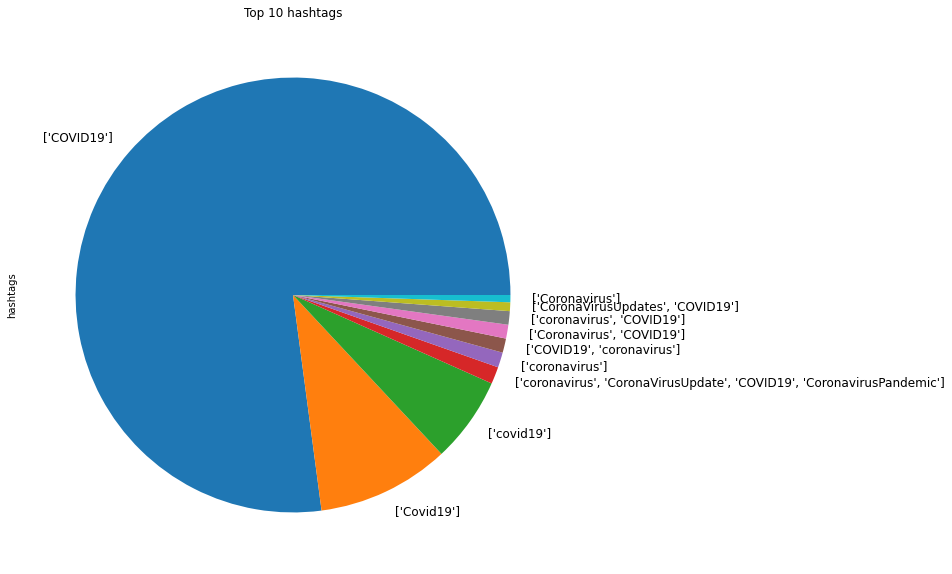

In [ ]:

top_hashtags=df['hashtags'].value_counts().sort_values(ascending=False)
#print(top_hashtags[:50])
plt.figure(figsize=(10,10))
top_hashtags[0:10].plot(kind = 'pie',title = 'Top 10 hashtags', fontsize=12)

# Generate a word cloud image

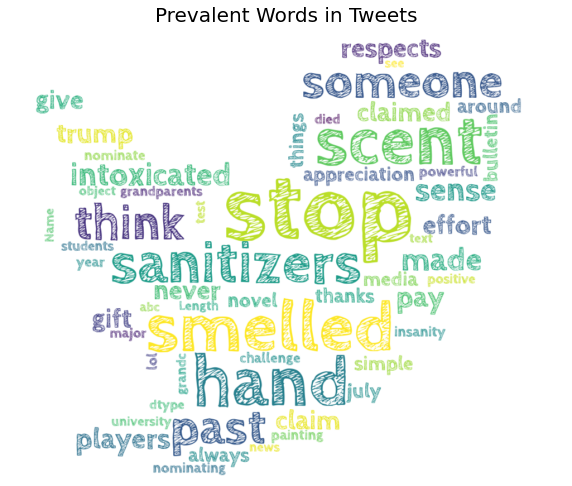

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open('image/twitter.png'))
wc = WordCloud(font_path='CabinSketch-Bold.ttf',background_color="white", max_words=500, mask=mask ,stopwords=STOPWORDS).generate(str(clean_tweets))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10]) 
plt.title("Prevalent Words in Tweets" ,fontsize=20)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# store to word cloud file
plt.savefig("image/twitter_mask.png", format="png",dpi=300 )

plt.show()

## At this part we draw the top 10 locations with more tweets

The location data was noisy and first we try to clean it a bit

In [ ]:

df["user_location"].replace({"New Delhi, India": "India","Pune, India": "India","Hyderabad, India": "India","Bengaluru, India": "India","New Delhi": "India", \
                             "Mumbai, India": "India", "Bhubaneshwar, India": "India", "Bhubaneswar": "India","Bangalore": "India", "Guwahati, India": "India",\
                             "Chennai, India": "India","Mumbai": "India" ,"Washington DC, US":"US","Washington DC, US":"US","Washington D.C., US":"US",\
                             "Seattle, WA":"US","Philadelphia, PA":"US","Las Vegas, NV":"US","USA":"US","Washington, DC":"US" ,"Washington, D.C.":"US",\
                             "New York, NY" :"US","United States":"US","Los Angeles, CA" :"US","Los Angeles" :"US","Texas" :"US","NYC" :"US","California,USA" :"US",\
                             "California" :"US","Houston, TX" :"US","New York City" :"US","Austin, TX" :"US","Boston, MA":"US","Chicago, IL":"US","New York":"US",\
                             "New Jersey, USA":"US","Atlanta, GA":"US","Texas, USA":"US","New York, USA":"US","San Diego, CA":"US","San Francisco, CA":"US",\
                             "Florida, USA":"US", "London":"UK" ,"London, England":"UK","England":"UK","London, UK":"UK","England, United Kingdom":"UK",\
                             "United Kingdom":"UK","Toronto, Ontario":"Canada","Ontario, Canada":"Canada","Toronto":"Canada" ,"WORLDWIDE":"WorldWide",\
                             "Worldwide":"WorldWide" ,"Melbourne, Victoria":"Australia","Melbourne, Australia":"Australia","Sydney, Australia":"Australia",\
                             "Sydney, New South Wales":"Australia","Geneva, Switzerland":"Switzerland","Manila, Philippines":"Philippines" ,\
                             "Johannesburg, South Africa":"South Africa" , "Cape Town, South Africa":"South Africa","Abuja, Nigeria":"Nigeria",\
                             "Lagos, Nigeria":"Nigeria" , "Nairobi, Kenya" :"Kenya" , "Nairobi" :"Kenya" ,"Dublin City, Ireland":"Ireland" ,\
                             "Dubai, United Arab Emirates":"United Arab Emirates"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



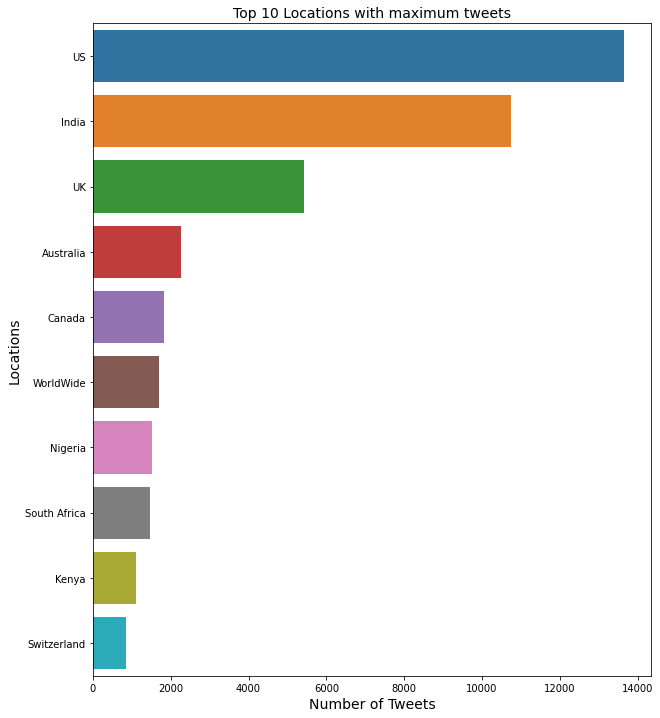

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(df["user_location"].value_counts().values[0:10],
            df["user_location"].value_counts().index[0:10]);
plt.title("Top 10 Locations with maximum tweets",fontsize=14)
plt.xlabel("Number of Tweets",fontsize=14)
plt.ylabel("Locations",fontsize=14)
plt.show()

## Number of Tweets per day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



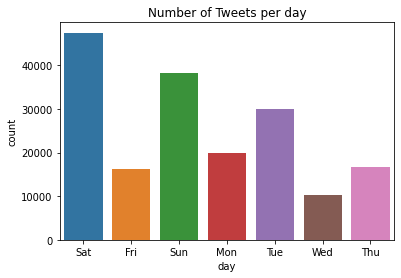

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Number of Tweets per day")
sns.countplot(df["day"])

## Top 10 Sources which used for Tweet

Here we try to plot top 10 sources which is used for Tweet

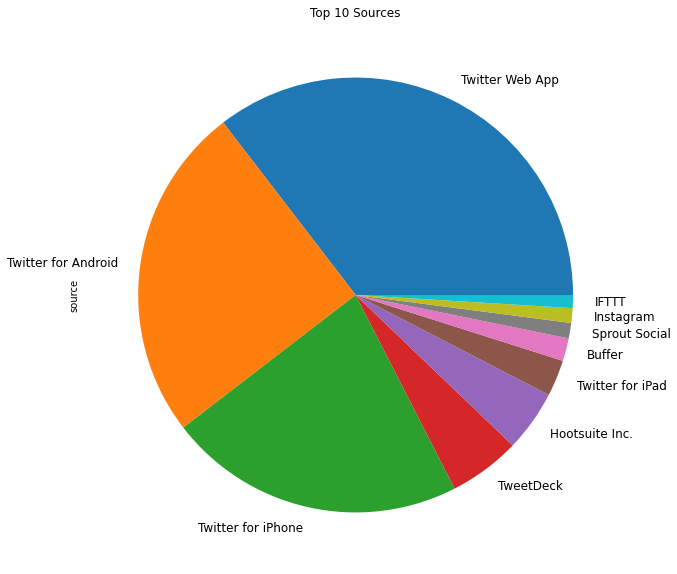

In [ ]:
top_source=df['source'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
top_source[0:10].plot(kind = 'pie',title = 'Top 10 Sources', fontsize=12)

# Stemming Tweet text

This function do the stemming on tokenized tweet text

In [ ]:

def steming_tweet(tweet_tokens):
    stemmer = PorterStemmer()
    tweets_clean = []
    for word in tweet_tokens.split():
           stem_word = stemmer.stem(word)  # stemming word
           tweets_clean.append(stem_word)        
    return tweets_clean

    

In [ ]:
#This part we run preprocess_tweets() for each tweet in df Dataframe
df['text'] = df['text'].apply(lambda x: steming_tweet(x))
display(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"[smell, scent, hand, sanit, someon, past, would, think, intox]",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,US,"Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,"[made, sens, player, pay, respect]",NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,"[trump, never, claim, claim, effort]",['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,"[gift, give, appreci, simpl, thing, alway, around]",['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,"[juli, media, bulletin, novel]","['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,"[thank, nomin, challeng, nomin]",['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,"When your cat has more baking soda than Ninja Turtles but your too punk to care. Gamer, Frisbee and sunshine these are a few of my favorite things. Metal!",2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,"[year, insan, lol]",['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did Want a World Govt of Corporations https://t.co/oYU6xhIIh8 #NonPartisanDemocracy\nGAB/Parler: Bee@Beehemoth,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,"[power, paint, grandpar, die, grandc]",NaN,Twitter Web App,False
179106,Gary DelPonte,US,"Global UX UI Visual Designer. StoryTeller, Musician. Nature Improvisation HealthCare Aeronautics Fashion Financial Entertainment Photography BridgeBuilder",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"[student, test, posit, major, univers, abc, news]",['COVID19'],Twitter for iPhone,False


In [ ]:
#Here we remove the tweets which does not have any data in their text (After Preprocessing)
#df = df.loc[df['text'].str.len() != 0 ]


In [ ]:
print("Total number of tweets after pre-processing:",len(df))

Total number of tweets after pre-processing: 179108


## At this section we try to do sentiment analysis for our tweet texts based on LIWC package

In [ ]:
# You should have a license for using "LIWC package"

In [ ]:
#uploaded = files.upload()

Saving LIWC2015Dictionary.dic to LIWC2015Dictionary.dic


In [ ]:

def sentiment_LIWC(df):
    parse, category_names = liwc.load_token_parser('LIWC2015Dictionary.dic')
    for i in range(len(df)):
        pos=0
        neg=0
        tweet_counts = Counter(category for token in df.iloc[i].text for category in parse(token))
        pos = tweet_counts['posemo']
        neg = tweet_counts['negemo']+tweet_counts['anx'] + tweet_counts['anger'] + tweet_counts['sad'] + tweet_counts['death']
       # print("pos",pos)
       # print("neg",neg)
        if pos > neg:
            df.loc[i,'sentiment'] = 1
        elif pos == neg:
            df.loc[i,'sentiment'] = 0
        else:
            df.loc[i,'sentiment'] = -1
    return(df)

In [ ]:
#This part we call the function sentiment_LIWC for finding the sentiments associated with each tweets

sentiment_LIWC(df)

# Categories in LIWC 

In [ ]:
_,category_names = liwc.load_token_parser('LIWC2015Dictionary.dic')
print(category_names)

In [ ]:
df['sentiment'].value_counts()

 0.0    100047
-1.0     42368
 1.0     36037
Name: sentiment, dtype: int64

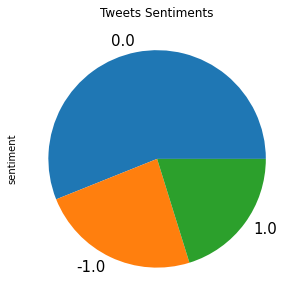

In [ ]:
plt.figure(figsize=(5,5))
df['sentiment'].value_counts().sort_values(ascending=False).plot(kind = 'pie',title = 'Tweets Sentiments', fontsize=15)

remove tweets which has NaN values

In [ ]:
df = df[df['text'].notna()]

In [ ]:
len(df)

177752

In [ ]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers someone past would think intoxicated,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,made sense players pay respects,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump never claimed claim effort,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,gift give appreciation simple things always around,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,thanks nominating challenge nominate,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,"When your cat has more baking soda than Ninja Turtles but your too punk to care. Gamer, Frisbee and sunshine these are a few of my favorite things. Metal!",2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,year insanity lol,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did Want a World Govt of Corporations https://t.co/oYU6xhIIh8 #NonPartisanDemocracy\nGAB/Parler: Bee@Beehemoth,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,powerful painting grandparents died grandc,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Musician. Nature Improvisation HealthCare Aeronautics Fashion Financial Entertainment Photography BridgeBuilder",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,students test positive major university abc news,['COVID19'],Twitter for iPhone,False


# Sentiment Analysis by VaderSentiment Package

In [ ]:

def sentiment_scores(df):
    sid_obj = SentimentIntensityAnalyzer()
    for i in range(len(df)):
        # Create a SentimentIntensityAnalyzer object. polarity_scores method of SentimentIntensityAnalyze oject gives a sentiment dictionary which contains pos, neg, neu, and compound scores.
        sentiment_dict = sid_obj.polarity_scores(' '.join(df.iloc[i].text))   # The parameter for polarity_scores() should be a sentence so we need to 
                                                                              #convert tokenized tweet to a sentence by .join()
    
        # decide sentiment as positive, negative and neutral #0.05
        if (sentiment_dict['compound'] > 0.0) :
            df.loc[i,'vaderSentiment'] = 'Positive'          #Positive Sentiment
            #print("Positive")
            
        elif (sentiment_dict['compound'] <  0.0) :
            df.loc[i,'vaderSentiment'] = 'Negative'         #Negative Sentiment
            #print("Negative")
            
        else :
            df.loc[i,'vaderSentiment'] = 'Neutral'         #Neutral Sentiment
            #print("Neutral")
    return(df)




In [ ]:
df.shape

(177819, 14)

Running this part takes 15 minutes

In [ ]:
sentiment_scores(df)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,vaderSentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"[smell, scent, hand, sanit, someon, past, would, think, intox]",NaN,Twitter for iPhone,False,Positive
1,Tom Basile 🇺🇸,US,"Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,"[made, sens, player, pay, respect]",NaN,Twitter for Android,False,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,"[trump, never, claim, claim, effort]",['COVID19'],Twitter for Android,False,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,"[gift, give, appreci, simpl, thing, alway, around]",['COVID19'],Twitter for iPhone,False,Positive
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,"[juli, media, bulletin, novel]","['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,"[thank, nomin, challeng, nomin]",['WearAMask'],Twitter for Android,False,Positive
179104,Jason,Ontario,"When your cat has more baking soda than Ninja Turtles but your too punk to care. Gamer, Frisbee and sunshine these are a few of my favorite things. Metal!",2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,"[year, insan, lol]",['COVID19'],Twitter for Android,False,Positive
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did Want a World Govt of Corporations https://t.co/oYU6xhIIh8 #NonPartisanDemocracy\nGAB/Parler: Bee@Beehemoth,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,"[power, paint, grandpar, die, grandc]",NaN,Twitter Web App,False,Negative
179106,Gary DelPonte,US,"Global UX UI Visual Designer. StoryTeller, Musician. Nature Improvisation HealthCare Aeronautics Fashion Financial Entertainment Photography BridgeBuilder",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"[student, test, posit, major, univers, abc, news]",['COVID19'],Twitter for iPhone,False,Neutral


In [ ]:
df.shape

(179108, 14)

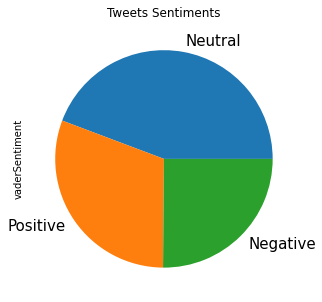

In [ ]:
plt.figure(figsize=(5,5))
df['vaderSentiment'].value_counts().sort_values(ascending=False).plot(kind = 'pie',title = 'Tweets Sentiments', fontsize=15)

In [ ]:
df['vaderSentiment'].value_counts()

Neutral     79292
Positive    54808
Negative    45008
Name: vaderSentiment, dtype: int64

## Generate word Clouds based on the Sentiments ( Positive,Negative Tweets)

In [ ]:
# Put the positive tweets in "Positive_clean_tweets" and Negative tweets in "Negative_clean_tweets"
Positive_clean_tweets = df[df['vaderSentiment']=='Positive']['text']
Negative_clean_tweets = df[df['vaderSentiment']=='Negative']['text']

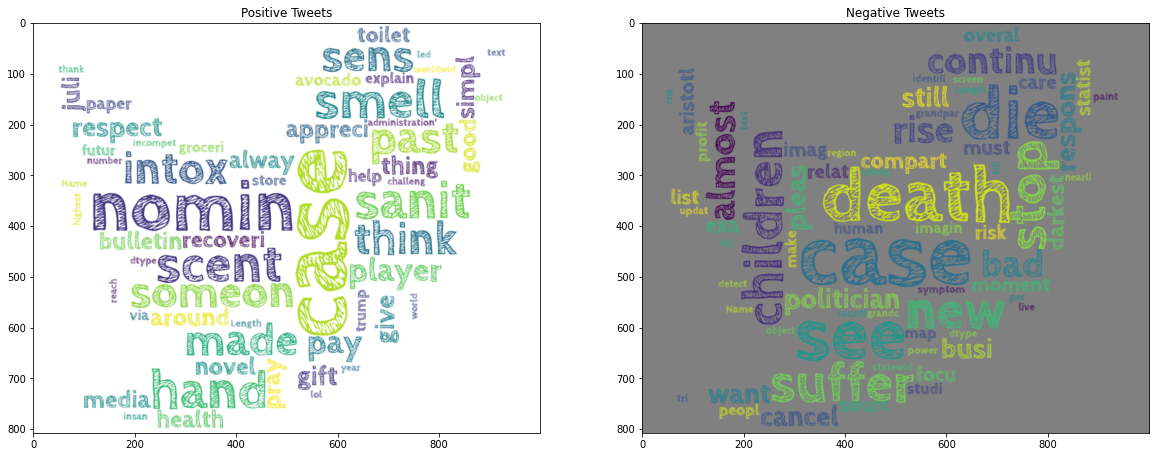

In [ ]:

# Generate a word cloud image
mask = np.array(Image.open('image/twitter.png'))
wc_pos = WordCloud(font_path='CabinSketch-Bold.ttf',background_color="white", max_words=500, mask=mask ,stopwords=STOPWORDS).generate(str(Positive_clean_tweets))
wc_neg = WordCloud(font_path='CabinSketch-Bold.ttf',background_color="gray", max_words=500, mask=mask ,stopwords=STOPWORDS).generate(str(Negative_clean_tweets))

# create coloring from image
image_colors = ImageColorGenerator(mask)

f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.title.set_text("Positive Tweets" )
ax1.imshow(wc_pos, interpolation="bilinear")
#plt.axis("off")
ax2.title.set_text("Negative Tweets" )
ax2.imshow(wc_neg, interpolation="bilinear")
#plt.axis("off")



Here we put the tokenized clean tweets and sentiments which is generated by VaderSentiment into a new Data Frame Called "sentiment_df"

In [ ]:
sentiment_df = pd.DataFrame()

In [ ]:
sentiment_df = df[['text','vaderSentiment']].copy()

In [ ]:
sentiment_df

,text,vaderSentiment
0,"[smell, scent, hand, sanit, someon, past, would, think, intox]",Positive
1,"[made, sens, player, pay, respect]",Positive
2,"[trump, never, claim, claim, effort]",Neutral
3,"[gift, give, appreci, simpl, thing, alway, around]",Positive
4,"[juli, media, bulletin, novel]",Positive
...,...,...
179103,"[thank, nomin, challeng, nomin]",Positive
179104,"[year, insan, lol]",Positive
179105,"[power, paint, grandpar, die, grandc]",Negative
179106,"[student, test, posit, major, univers, abc, news]",Neutral


In [ ]:
sentiment_df.shape

(176558, 2)

remove the tweets which has NaN value in their sentiments

In [ ]:
#sentiment_df = sentiment_df[sentiment_df['vaderSentiment'].notna()]
#sentiment_df = sentiment_df[sentiment_df['text'].notna()]

Convert Tokenized tweet to sentence

In [ ]:
sentiment_df['text'] = sentiment_df['text'].apply(lambda x:' '.join([item for item in x]))

In [ ]:
sentiment_df

,text,vaderSentiment
0,smell scent hand sanit someon past would think intox,Positive
1,made sens player pay respect,Positive
2,trump never claim claim effort,Neutral
3,gift give appreci simpl thing alway around,Positive
4,juli media bulletin novel,Positive
...,...,...
179103,thank nomin challeng nomin,Positive
179104,year insan lol,Positive
179105,power paint grandpar die grandc,Negative
179106,student test posit major univers abc news,Neutral


Here we keep the clean tweet dataset in a CSV file called "clean_tweets_sentiment.csv"

In [ ]:
sentiment_df.to_csv(r'Data/clean_tweets_sentiment.csv')

We can read the data based on the saved clean preprocessed tweets and put it in Sentiment_df 

In [ ]:
#os.getcwd()
#df = pd.read_csv("Data/clean_tweets_sentiment.csv")
#df.pop('Unnamed: 0')
#df.head(5)

,text,vaderSentiment
0,smell scent hand sanit someon past would think...,Positive
1,made sens player pay respect,Positive
2,trump never claim claim effort,Neutral
3,gift give appreci simpl thing alway around,Positive
4,juli media bulletin novel,Positive


In [ ]:
#sentiment_df = df[['text','vaderSentiment']].copy()
#sentiment_df.head(5)

,text,vaderSentiment
0,smell scent hand sanit someon past would think...,Positive
1,made sens player pay respect,Positive
2,trump never claim claim effort,Neutral
3,gift give appreci simpl thing alway around,Positive
4,juli media bulletin novel,Positive


# Train a model to predict the gender based on an annotated tweet gender data set

In [ ]:
df_gender = pd.read_csv("Data/gender-classifier-DFE-791531.csv" ,encoding='latin-1')

In [ ]:
df_gender.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229096808449/fYvzqXN7_normal.png,0,FFFFFF,Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family drama and romance.,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221532700673/WW16tBbU_normal.jpeg,0,C0DEED,ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418249658368/SBLCXdF7_normal.png,1,C0DEED,i absolutely adore when louis starts the songs it hits me hard but it feels good,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force. Stanford GSB, UVa. Dad, Husband, Brother. Golfer.",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936/IMG_8444_normal.JPG,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you use @IFTTT?! Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871032446976/AOfpk-mr_normal.jpeg,0,0,Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
df_gender.shape

(20050, 26)

In [ ]:
sum(df_gender["gender:confidence"] > 0.80)/df_gender.shape[0]

0.695211970074813

We kept the tweets which has the gender confidence more than 80% from the data set


In [ ]:
df_gender[df_gender["gender:confidence"] > 0.80]["gender"].value_counts()

female     5371
male       4658
brand      3788
unknown     122
Name: gender, dtype: int64

we just keep description and gender columns to make the model

In [ ]:
df_gender = df_gender[df_gender["gender"].isin(["male", "female"]) & (df_gender["gender:confidence"] > 0.80)][['text','gender']]


In [ ]:
df_gender['text']

0        Robbie E Responds To Critics After Win Against...
1        ÛÏIt felt like they were my friends and I was...
3        Hi @JordanSpieth - Looking at the url - do you...
4        Watching Neighbours on Sky+ catching up with t...
5        Ive seen people on the train with lamps, chair...
                               ...                        
20044    Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...
20045    @lookupondeath ...Fine, and I'll drink tea too...
20046    Greg Hardy you a good player and all but don't...
20047    You can miss people and still never want to se...
20049    I think for my APUSH creative project I'm goin...
Name: text, Length: 10020, dtype: object

This part we do pre_process and stemming on the text of tweets 

In [ ]:
df_gender['text'] = df_gender['text'].apply(lambda x: preprocess_tweets(str(x)))

In [ ]:
df_gender['text']

0                                                                   [robbie, e, responds, critics, win, eddie, edwards]
1                                                                [, ûïit, felt, like, friends, living, story, , û, ]
3                                                               [hi, looking, url, use, typically, see, advanced, user]
4        [watching, neighbours, sky, catching, neighbs, xxx, _ù, ÷, ä_ù, ÷, ä_ù, ÷, ä_ùôî_ù, , è_ùô, , _ù, , è, xxx]
5                                                                   [ive, seen, people, train, lamps, chairs, tvs, etc]
                                                              ...                                                      
20045                                                                               [..., fine, i'll, drink, tea, love]
20046                                           [greg, hardy, good, player, get, face, dez, bryant, learn, place, mane]
20047                                   

Input for stemming_tweet() function should be a sentence so we convert the tokenized tweet to sentence

In [ ]:
df_gender['text'] = df_gender['text'].apply(lambda x:' '.join([item for item in x])) 

In [ ]:
df_gender['text'] = df_gender['text'].apply(lambda x: steming_tweet(x))

In [ ]:
df_gender['text']

0                                                                [robbi, e, respond, critic, win, eddi, edward]
1                                                           [, ûïit, felt, like, friend, live, stori, , û, ]
3                                                                [hi, look, url, use, typic, see, advanc, user]
4        [watch, neighbour, sky, catch, neighb, xxx, _ù, ÷, ä_ù, ÷, ä_ù, ÷, ä_ùôî_ù, , è_ùô, , _ù, , è, xxx]
5                                                               [ive, seen, peopl, train, lamp, chair, tv, etc]
                                                          ...                                                  
20045                                                                       [..., fine, i'll, drink, tea, love]
20046                                   [greg, hardi, good, player, get, face, dez, bryant, learn, place, mane]
20047                                                                    [miss, peopl, still, never, wan

After stemming again we need to convert the tokenized work to a sentence


In [ ]:
df_gender['text'] = df_gender['text'].apply(lambda x:' '.join([item for item in x])) 

In [ ]:
df_gender['text']

0                                                   robbi e respond critic win eddi edward
1                                                  ûïit felt like friend live stori  û 
3                                                    hi look url use typic see advanc user
4        watch neighbour sky catch neighb xxx _ù ÷ ä_ù ÷ ä_ù ÷ ä_ùôî_ù  è_ùô  _ù  è xxx
5                                                   ive seen peopl train lamp chair tv etc
                                               ...                                        
20045                                                         ... fine i'll drink tea love
20046                          greg hardi good player get face dez bryant learn place mane
20047                                                      miss peopl still never want see
20048                                           notic tendenc pee carpet want say anyth :p
20049     think apush creativ project i'm go bring bacon class eat repres bacon' rebellion

Here we convert categorial "female" and "male" into 1 and 0

In [ ]:
df_gender.gender = df_gender.gender.replace({"female": 0, "male": 1})

Here we rename the "gender" and "text" columns in Dataframe

In [ ]:
df_gender = df_gender.rename(columns={"gender": "label"})

In [ ]:
df_gender["label"].value_counts()

0    5371
1    4658
Name: label, dtype: int64

In [ ]:
#Check if we have any null values in df_gender
df_gender.isnull().values.any()

False

At this part we put the tweet text into the "clean_gender_tweet" and then try to convert them into vectors by "CountVectorizer" module


In [ ]:
clean_gender_tweet = []
clean_gender_tweet = df_gender['text']
#label_encoder = LabelEncoder()

#labels_gender_tweet = label_encoder.fit_transform(df_gender['gender'])
labels_gender_tweet = df_gender['label']

In [ ]:
max_features = 5000 # we will take top 5000 feature

vectorizer = CountVectorizer(max_features=max_features, stop_words = "english")
vectorizer.fit(clean_gender_tweet)
print ("Total vocabulary: ",len(vectorizer.vocabulary_))

encoded_gender_tweets = vectorizer.transform(clean_gender_tweet)
print (repr(encoded_gender_tweets))


Total vocabulary:  5000
<10029x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 60798 stored elements in Compressed Sparse Row format>


This step we split encoded_gender_tweets into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    encoded_gender_tweets, labels_gender_tweet) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print(X_train.shape)
print(X_test.shape)

(7521, 5000)
(2508, 5000)


This part ,we use **MultinomialNB** to predict the Gender based on the tweet text


In [ ]:


#Time to train NaiveByes on the document-term matrix and corresponding classes
NB_clf = MultinomialNB(alpha=1.0)

NB_clf.fit(X_train,y_train)

# Here we measure precision, recall and F-measure
NB_prediction = NB_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",NB_clf.score(X_train,y_train))
print("Test accuracy Score    : ", NB_clf.score(X_test,y_test))
print("Validation accuracy Score : ",NB_accuracy )
print("")
print("Classification Report for Naive Bayes Classifier:\n")
print(classification_report(NB_prediction,y_test,target_names=['female','male']))

Training accuracy Score    :  0.7851349554580508
Test accuracy Score    :  0.6064593301435407
Validation accuracy Score :  0.6064593301435407

Classification Report for Naive Bayes Classifier:

              precision    recall  f1-score   support

      female       0.68      0.62      0.65      1458
        male       0.53      0.59      0.56      1050

    accuracy                           0.61      2508
   macro avg       0.60      0.60      0.60      2508
weighted avg       0.61      0.61      0.61      2508



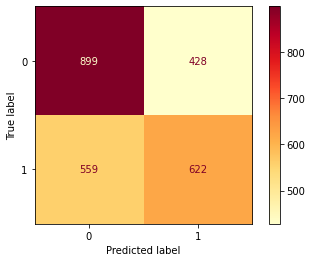

In [ ]:
plot_confusion_matrix(NB_clf, X_test, y_test, cmap = "YlOrRd" ,values_format='')  
#"YlGn_r"OrRd YlOrRd
plt.show()


XGBoost with Default Paramters

In [ ]:
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=['female','male']))



Training accuracy Score    :  0.6067012365376945
Validation accuracy Score :  0.5566188197767146

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

      female       0.92      0.55      0.69      2223
        male       0.15      0.62      0.24       285

    accuracy                           0.56      2508
   macro avg       0.53      0.58      0.46      2508
weighted avg       0.83      0.56      0.64      2508



This part we try to tune the hyper parameters for XGBoost Model

In [ ]:
params = { 'max_depth': [6,8,10,12],
           'learning_rate': [0.01, 0.05, 0.08],
           'n_estimators': [700, 900,1000],
           'colsample_bytree': [0.7, 0.8,1.0]}
xgb = XGBClassifier( three_method = 'gpu_exact',
                    silent=True, nthread=2,n_gpus=1,predictor = 'gpu_predictor',max_bin = 16)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=5, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 20.2min remaining:    0.0s
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 20.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7effafc89ed0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_bin=16,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_gpus=1, n_jobs=1,
                                           nthread=2,
                                           objec...
                                           seed=None, silent=True, subsample=1,
                                           three_method='gpu_exact',
                                           verbosi

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [ ]:
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier(use_label_encoder=False,n_estimators= 1000, max_depth = 10, learning_rate = 0.05, colsample_bytree = 0.7)

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=['female','male']))



Training accuracy Score    :  0.7613349288658423
Validation accuracy Score :  0.5901116427432217

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

      female       0.71      0.59      0.65      1583
        male       0.46      0.58      0.51       925

    accuracy                           0.59      2508
   macro avg       0.58      0.59      0.58      2508
weighted avg       0.62      0.59      0.60      2508



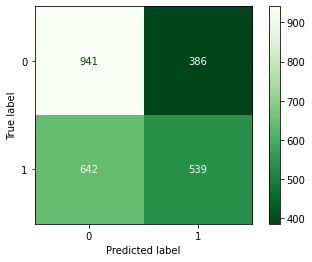

In [ ]:
plot_confusion_matrix(xgboost_clf, X_test, y_test , cmap= "Greens_r" ,values_format='')  
plt.show()

This part ,we use **Random Forest** to predict the Gender based on the tweet text

In [ ]:

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("\n")
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print("")
print("Classification Report for Random Forest Classifier:\n")
print(classification_report(rf_prediction,y_test,target_names=['female','male']))



Training accuracy Score    :  0.9901608828613216
Validation accuracy Score :  0.6004784688995215

Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

      female       0.67      0.61      0.64      1461
        male       0.52      0.59      0.55      1047

    accuracy                           0.60      2508
   macro avg       0.60      0.60      0.60      2508
weighted avg       0.61      0.60      0.60      2508



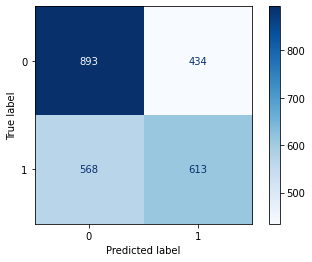

In [ ]:
plot_confusion_matrix(rf_clf, X_test, y_test,cmap=plt.cm.Blues,values_format='')  
plt.show()

This part ,we use **Support Vector Machine** to predict the Gender based on the tweet text

The first step was tunning the hyper parameters for SVC by "GridSearchCV" . **Note:** Running this part took approximately 1 hour to run.

In [ ]:

JOBS = 4
PARAMS = [{'C': [4, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001],
           'kernel': ["linear", "poly", "rbf", "sigmoid"],
           'cache_size': [1000],
           'gamma': ['auto', 1.0, 1.0e-1, 1.0e-2, 1.0e-3, 1.0e-4, 1.0e-5, 1.0e-6]}]

grid_search = GridSearchCV(SVC(), PARAMS, n_jobs=JOBS, verbose=5, cv=4,
                           scoring="f1")
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 320 candidates, totalling 1280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 19.0min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 26.3min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 43.6min
[Parallel(n_jobs=4)]: Done 1280 out of 1280 | elapsed: 48.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [4, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.001,
                                0.0001],
                          'cache_size': [1000],
                          'gamma': ['auto', 1.0, 0.1, 0.01, 0.001, 0.0001,
                                    1e-05, 1e-06],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=5)

Here we get the best hyperparameter after tuning

In [ ]:
grid_search.best_params_

{'C': 4, 'cache_size': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

We used the SVM based on best predicted parameters after tuning the hyper parameters

In [ ]:

svc_clf = SVC(C= 4, cache_size=1000, gamma= 0.1, kernel= 'rbf')

svc_clf.fit(X_train, y_train)

svc_prediction = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print("")
print("Classification Report for Support Vector Machine Classifier:\n")
print(classification_report(svc_prediction,y_test,target_names=['female','male']))

Training accuracy Score    :  0.9683552719053318
Validation accuracy Score :  0.5992822966507177

Classification Report for Support Vector Machine Classifier:

              precision    recall  f1-score   support

      female       0.66      0.61      0.63      1418
        male       0.54      0.58      0.56      1090

    accuracy                           0.60      2508
   macro avg       0.60      0.60      0.60      2508
weighted avg       0.60      0.60      0.60      2508



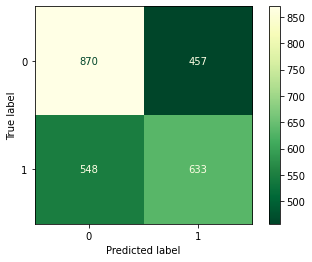

In [ ]:
plot_confusion_matrix(svc_clf, X_test, y_test,cmap= "YlGn_r" , values_format='')  
plt.show()

This part ,we use **Logistic Regression** to predict the Gender based on the tweet text

In [ ]:

lr_clf = LogisticRegression(max_iter = 2000)
lr_clf.fit(X_train,y_train)
# prediction
lr_prediction = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_prediction)
print("Training accuracy Score    : ",lr_clf.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print("")
print("Classification Report for Support Vector Machine Classifier:\n")
print(classification_report(svc_prediction,y_test,target_names=['female','male']))


Training accuracy Score    :  0.8405797101449275
Validation accuracy Score :  0.6068580542264753

Classification Report for Support Vector Machine Classifier:

              precision    recall  f1-score   support

      female       0.66      0.61      0.63      1418
        male       0.54      0.58      0.56      1090

    accuracy                           0.60      2508
   macro avg       0.60      0.60      0.60      2508
weighted avg       0.60      0.60      0.60      2508



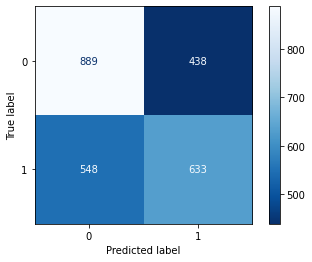

In [ ]:
plot_confusion_matrix(lr_clf, X_test, y_test, cmap = "Blues_r" ,values_format='')  
#"YlGn_r"OrRd YlOrRd
plt.show()

Here we put the tweet text into an array tweet_text


In [ ]:
tweet_text = []
tweet_text = sentiment_df['text'].tolist()

Here we convert the main tweet dataset into the encoded_tweets to predict the gender for each tweet based on the relevant text and the trained model by Naive Bayes

In [ ]:
encoded_tweets = vectorizer.transform(tweet_text)

In [ ]:
encoded_tweets.shape

(179108, 5000)

Predict the Gender Basedon Naive Bayes Model

In [ ]:
gender_predicted_NB = NB_clf.predict(encoded_tweets)


Predict the Gender Based on Random Forest Model

In [ ]:
#gender_predicted_RF = rf_clf.predict(encoded_tweets)


Predict the Gender Based on Support Vector Machine Model

In [ ]:
#gender_predicted_SVM = svc_clf.predict(encoded_tweets)


Predict the Gender Based on XGBoost Model

In [ ]:
#gender_predicted_Xgboost = xgboost_clf.predict(encoded_tweets)


In [ ]:
gender_predicted_NB.shape

(179108,)

add the predicted gender filed into the sentiment_df

In [ ]:
sentiment_df['gender']=gender_predicted_NB

In [ ]:
sentiment_df

,text,vaderSentiment,gender
0,smell scent hand sanit someon past would think intox,Positive,1
1,made sens player pay respect,Positive,1
2,trump never claim claim effort,Neutral,0
3,gift give appreci simpl thing alway around,Positive,0
4,juli media bulletin novel,Positive,1
...,...,...,...
179103,thank nomin challeng nomin,Positive,1
179104,year insan lol,Positive,0
179105,power paint grandpar die grandc,Negative,0
179106,student test posit major univers abc news,Neutral,1


In [ ]:
sentiment_df["gender"].replace({0: "female", 1: "male"}, inplace=True)

In [ ]:
sentiment_df.groupby(['gender']).count()

,text,vaderSentiment
gender,,
female,63424,63424
male,115684,115684


In [ ]:
plt.figure(figsize=(5,5))
sentiment_df.groupby(['vaderSentiment','gender']).count()

text
vaderSentiment gender       
Negative       female  15724
               male    29284
Neutral        female  28510
               male    50782
Positive       female  19190
               male    35618

<Figure size 360x360 with 0 Axes>

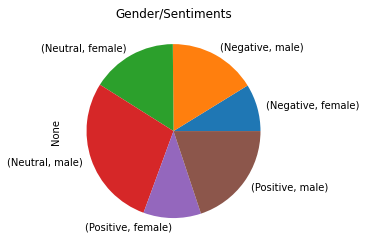

In [ ]:
sentiment_df.pivot_table(columns=['vaderSentiment','gender'],aggfunc='size').plot(kind='pie' ,title='Gender/Sentiments')

# At this part we try to convert each word in Tweet to an integer for doing classification based on tweet sentiments

we append each tweet text to the tweet_text list

In [ ]:
sentiment_df

,text,vaderSentiment
0,smell scent hand sanit someon past would think...,Positive
1,made sens player pay respect,Positive
2,trump never claim claim effort,Neutral
3,gift give appreci simpl thing alway around,Positive
4,juli media bulletin novel,Positive
...,...,...
179103,thank nomin challeng nomin,Positive
179104,year insan lol,Positive
179105,power paint grandpar die grandc,Negative
179106,student test posit major univers abc news,Neutral


In [ ]:
sentiment_df.dropna(inplace=True,axis=0)

#Check if we have any null values in sentiment_df
sentiment_df.isnull().values.any()


False

In [ ]:
sentiment_df['text']

0         smell scent hand sanit someon past would think...
1                              made sens player pay respect
2                            trump never claim claim effort
3                gift give appreci simpl thing alway around
4                                 juli media bulletin novel
                                ...                        
179103                           thank nomin challeng nomin
179104                                       year insan lol
179105                      power paint grandpar die grandc
179106            student test posit major univers abc news
179107                                        stop see stop
Name: text, Length: 177819, dtype: object

Here we keep the clean tweet dataset in a CSV file called "clean_tweets_sentiment.csv"

In [ ]:
#sentiment_df.to_csv(r'clean_tweets_sentiment.csv')

find the maximum length of tweet text

In [ ]:
temp = []
for i in range(len(sentiment_df)):
    temp.append(len(sentiment_df.iloc[i].text.split()))

In [ ]:
temp.sort(reverse = True)

In [ ]:
print("The maimum number of words in tweet texts is :",temp[:1])

The maimum number of words in tweet texts is : [63]




---



Here we Convert Categorical data to integer for the sentiments

In [ ]:
label_encoder = LabelEncoder()

labels = label_encoder.fit_transform(sentiment_df['vaderSentiment'])

In [ ]:
print(label_encoder.classes_)

['Negative' 'Neutral' 'Positive']


In [ ]:
len(labels)

179108

Now we need to convert the text into the bag of words representation--i.e., count words and their frequencies. CountVectorizer class in scikit-learn can help us do this. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

We've checked vectorizing using TF-IDF technique but its not performing well so going ahead with CountVectorize

In [ ]:
# Initialize Count Vectorizer object
print ("Please wait.....")
vect=CountVectorizer()
vect.fit(tweet_text)
print ("Total vocabulary: ",len(vect.vocabulary_))


Please wait.....
Total vocabulary:  52627


Now, we have seen that CountVectorizer has measured the frequencies. Let's get the document and term matrix. In document and term matrix, each row represents a document, each column represents the word and each cell reprsents the frequencies.

In [ ]:
print ("Wait for me to finish......")
encoded_tweets = vect.transform(tweet_text)
print (repr(encoded_tweets))

Wait for me to finish......
<177819x52627 sparse matrix of type '<class 'numpy.int64'>'
	with 1369663 stored elements in Compressed Sparse Row format>


In [ ]:
print(encoded_tweets.shape,len(labels))

(177819, 52627) 177819


Here we split the encoded_tweets into test and train subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    encoded_tweets, labels, test_size=0.3, random_state=1, stratify=labels) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print(X_train.shape)
print(y_train.shape)

(124473, 52627)
(124473,)


## Implementing Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Time to train NaiveByes on the document-term matrix and corresponding classes
NB_clf = MultinomialNB(alpha=1.0)

NB_clf.fit(X_train,y_train)

# Here we measure precision, recall and F-measure
NB_prediction = NB_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",NB_clf.score(X_train,y_train))
print("Test accuracy Score    : ", NB_clf.score(X_test,y_test))
print("Validation accuracy Score : ",NB_accuracy )
print("")
print("Classification Report for Naive Bayes Classifier:\n")
print(classification_report(NB_prediction,y_test ,target_names=label_encoder.classes_))

Training accuracy Score    :  0.9059474745527143
Test accuracy Score    :  0.862407678176433
Validation accuracy Score :  0.862407678176433

Classification Report for Naive Bayes Classifier:

              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81     14208
     Neutral       0.87      0.96      0.91     21173
    Positive       0.88      0.81      0.84     17965

    accuracy                           0.86     53346
   macro avg       0.86      0.85      0.85     53346
weighted avg       0.86      0.86      0.86     53346



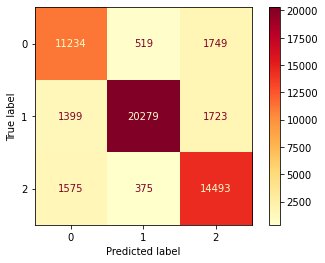

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#labels = ['Negative', 'Neutral','Positive']
plot_confusion_matrix(NB_clf, X_test, y_test, cmap = "YlOrRd" ,values_format='')  
#"YlGn_r"OrRd YlOrRd
plt.show()

In [ ]:
NB_clf.score(X_test,y_test)

0.862407678176433

## Implementing the XGBoost Classifier

When we run the XGBoost with default parameters and without any tuning the hyperparameters we got 73% Accuracy and then based on several steps for tuning with "RandomizedSearchCV"
We got the accuracy 96%

Note: Running this part took around 5.5 hours

In [ ]:
params = { 'max_depth': [8,10,12],
           'learning_rate': [0.01, 0.05, 0.08],
           'n_estimators': [500, 800,1000],
           'colsample_bytree': [0.8, 0.9,1.0]}
xgb = XGBClassifier( three_method = 'gpu_exact',objective='multi:softmax',
                    silent=True, nthread=2,n_gpus=1,predictor = 'gpu_predictor',max_bin = 16)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=5, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )




In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 334.8min remaining:    0.0s
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 334.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f9750a807d0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_bin=16,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_gpus=1, n_jobs=1,
                                           nthread=2, objec...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           three_method='gpu_exact',
                

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'n_estimators': 1000, 'max_depth': 12, 'learning_rate': 0.08, 'colsample_bytree': 0.8}


In [ ]:
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier(use_label_encoder=False,n_estimators= 1000, max_depth = 12, learning_rate = 0.08, colsample_bytree = 0.8)

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=label_encoder.classes_))



Training accuracy Score    :  0.9734882263623437
Validation accuracy Score :  0.9638585835863982

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95     12943
     Neutral       0.99      0.96      0.97     24105
    Positive       0.96      0.97      0.96     16298

    accuracy                           0.96     53346
   macro avg       0.96      0.96      0.96     53346
weighted avg       0.96      0.96      0.96     53346



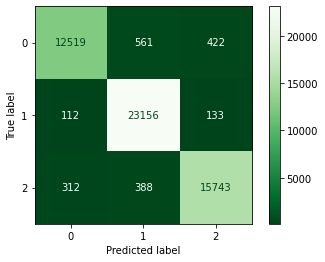

In [ ]:
plot_confusion_matrix(xgboost_clf, X_test, y_test , cmap= "Greens_r" ,values_format='')  
plt.show()

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 225.4min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f9766986950>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_bin=16,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_gpus=1, n_jobs=1,
                                           nthread=2, objec...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           three_method='gpu_exact',
                

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([2419.88050871, 3066.67341032, 1284.98233838, 3134.2820837 ,
        681.51262851]), 'std_fit_time': array([ 48.35785147,  13.2746128 ,  45.17979032, 540.94963324,
        83.03146631]), 'mean_score_time': array([0.54496679, 0.57080221, 0.50327444, 0.48150573, 0.4386209 ]), 'std_score_time': array([0.05854553, 0.02285027, 0.03249382, 0.1501941 , 0.09980339]), 'param_n_estimators': masked_array(data=[800, 800, 300, 800, 300],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 10, 10, 10, 6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.01, 0.01, 0.01],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[0.9, 0.9, 0.9, 1.0, 1.0],
             mas

In [ ]:


print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [ ]:
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier(use_label_encoder=False,n_estimators= 800, max_depth = 10, learning_rate = 0.05, colsample_bytree = 0.9)

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=label_encoder.classes_))



Training accuracy Score    :  0.9411518963952021
Validation accuracy Score :  0.932047388745173

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90     11868
     Neutral       0.99      0.90      0.94     25690
    Positive       0.92      0.96      0.94     15788

    accuracy                           0.93     53346
   macro avg       0.92      0.94      0.93     53346
weighted avg       0.94      0.93      0.93     53346



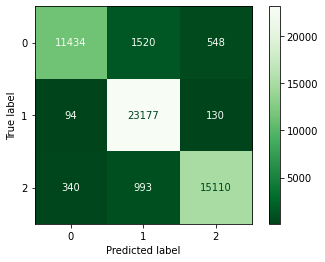

In [ ]:
plot_confusion_matrix(xgboost_clf, X_test, y_test , cmap= "Greens_r" ,values_format='')  
plt.show()

In [ ]:
#import xgboost as xgb
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier(use_label_encoder=False,n_estimators= 500, max_depth = 8, learning_rate = 0.05, colsample_bytree = 0.7)

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=label_encoder.classes_))



Training accuracy Score    :  0.9055056116587533
Validation accuracy Score :  0.8973681250702958

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

    Negative       0.79      0.96      0.86     11101
     Neutral       0.99      0.85      0.91     27387
    Positive       0.86      0.95      0.90     14858

    accuracy                           0.90     53346
   macro avg       0.88      0.92      0.89     53346
weighted avg       0.91      0.90      0.90     53346



In [ ]:
#import xgboost as xgb
import xgboost
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

xgboost_clf = xgboost.XGBClassifier(use_label_encoder=False)

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("\n")
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print("")
print("Classification Report for XGBoost Classifier:\n")
print(classification_report(xgb_prediction,y_test,target_names=label_encoder.classes_))



Training accuracy Score    :  0.73780259222333
Validation accuracy Score :  0.7340740327173245

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

    Negative       0.43      0.95      0.59      6082
     Neutral       1.00      0.64      0.78     36811
    Positive       0.61      0.92      0.73     10840

    accuracy                           0.73     53733
   macro avg       0.68      0.84      0.70     53733
weighted avg       0.85      0.73      0.75     53733



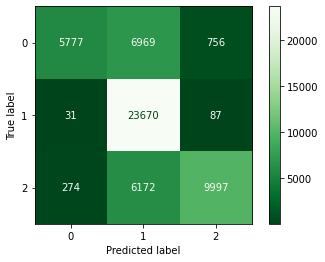

In [ ]:
plot_confusion_matrix(xgboost_clf, X_test, y_test , cmap= "Greens_r" ,values_format='')  
plt.show()

## Implementing Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("\n")
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print("")
print("Classification Report for Random Forest Classifier:\n")
print(classification_report(rf_prediction,y_test))



Training accuracy Score    :  0.9998071871008171
Validation accuracy Score :  0.956322873317587

Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12909
           1       0.99      0.97      0.98     23881
           2       0.95      0.94      0.95     16556

    accuracy                           0.96     53346
   macro avg       0.95      0.95      0.95     53346
weighted avg       0.96      0.96      0.96     53346



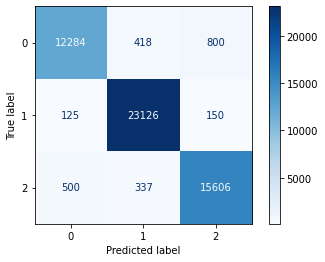

In [ ]:
plot_confusion_matrix(rf_clf, X_test, y_test,cmap=plt.cm.Blues,values_format='')  
plt.show()

# Implementing Support Vector Machine Classifier

**Note:** This part took 2:30 hours to run

In [ ]:
from sklearn.svm import SVC


svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_prediction = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print("")
print("Classification Report for Support Vector Machine Classifier:\n")
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9857547357926222
Validation accuracy Score :  0.9469785792715836

Classification Report for Support Vector Machine Classifier:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12457
           1       0.99      0.94      0.96     25038
           2       0.94      0.95      0.94     16238

    accuracy                           0.95     53733
   macro avg       0.94      0.95      0.94     53733
weighted avg       0.95      0.95      0.95     53733



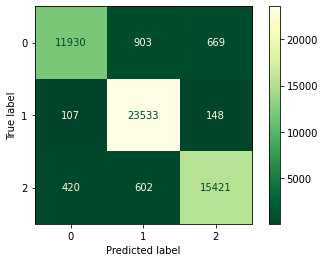

In [ ]:
plot_confusion_matrix(svc_clf, X_test, y_test,cmap= "YlGn_r" , values_format='')  
plt.show()

## The result of Test Accuracy for classification Models

In [ ]:
final_result = pd.DataFrame()
final_result = pd.DataFrame({'Model': ['Naive Bayes','XGBoost','Random Forest','Support Vector Machines'], 'Test Accuracy': [NB_accuracy,xgb_accuracy,rf_accuracy,svc_accuracy ]})

final_result.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy
1,XGBoost,0.963859
2,Random Forest,0.956323
3,Support Vector Machines,0.946979
0,Naive Bayes,0.862408
